In [ ]:
# this is for question one

In [1]:
import pandas as pd
import numpy as np
import calendar
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

reg1 = re.compile(r'[0-9][0-9][]0-9][0-9]-[0-9][0-9]-[]0-9][0-9]')

# convert '2018-02-15 1:40' to 'February'
def change_to_month (create_time):
    return reg1.search(str(create_time)).group()[0:7]


In [2]:
# create dataframe from csv files
PATH = 'C:/temp6/Assessment/ACE/'
df_spec = pd.read_csv(PATH + 'acereport_specialty.csv')
df_read = pd.read_csv(PATH + 'raw_reads.csv')

# add [Month] column to df_read dataframe
df_read['Month'] = df_read[['CreatedDate']].apply(change_to_month, axis=1)

# rename df_spec columns
df_spec.columns = ['AceReportId', 'Specialty']

# merge df_read and df_spec dataframe
df_merge = pd.merge (df_read, df_spec, on='AceReportId')
df_merge.head(15)

,AceReportId,UserId,CreatedDate,Month,Specialty
0,362,8b05e5f8-94e9-421b-9370-3b7a26094de2,2018-01-01 6:19,2018-01,Trauma
1,362,2119,2018-04-01 17:53,2018-04,Trauma
2,362,c835fe69-6f05-4014-b330-39f827740216,2018-04-30 2:26,2018-04,Trauma
3,362,11357,2018-05-02 18:23,2018-05,Trauma
4,362,34398,2018-05-04 13:58,2018-05,Trauma
5,362,36567,2018-05-06 0:07,2018-05,Trauma
6,362,03e32379-736a-4641-85e9-279fdd8399b1,2018-10-01 1:53,2018-10,Trauma
7,7578,a93a2f16-aa19-4387-9ba3-e5ceeb1a59a2,2018-01-01 12:23,2018-01,Arthroplasty
8,7578,a54d43a9-1c7e-4d39-aff5-56e7de918a98,2018-02-16 6:09,2018-02,Arthroplasty
9,7578,38524,2018-02-18 11:06,2018-02,Arthroplasty


In [3]:
list_month = df_read['Month'].drop_duplicates().sort_values().tolist()
list_month

['2018-01',
 '2018-02',
 '2018-03',
 '2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11',
 '2018-12']

In [4]:
# create a dataframe with 3 top users
df_user = df_merge.groupby(['UserId']).count()
df_user.sort_values(by='CreatedDate', ascending=False, inplace=True)

df_topuser_index = df_user.head(3).index.get_level_values(0).values
df_topUsers = pd.DataFrame({'UserId': df_topuser_index[0:]})
df_topUsers

,UserId
0,21221
1,d86064c9-f9dd-4193-94a3-ed7b9f86dd38
2,20f3727b-dea3-4189-8b55-4173bc3282b1


In [5]:
# get 3 top readers' reads by month and speciality
df_topUserDetail=pd.merge (df_topUsers,df_merge, on='UserId', how='left') 
df_3users= df_topUserDetail.groupby(['UserId','Specialty', 'Month']).count().reset_index()

# userId is too long. make it short
user_map={'20f3727b-dea3-4189-8b55-4173bc3282b1':'user_1','21221':'user_2','d86064c9-f9dd-4193-94a3-ed7b9f86dd38':'user_3'}
df_3users['UserSimpleId'] = df_3users['UserId'].map(user_map)
df_3users

,UserId,Specialty,Month,AceReportId,CreatedDate,UserSimpleId
0,20f3727b-dea3-4189-8b55-4173bc3282b1,Arthroplasty,2018-02,2,2,user_1
1,20f3727b-dea3-4189-8b55-4173bc3282b1,Arthroplasty,2018-03,3,3,user_1
2,20f3727b-dea3-4189-8b55-4173bc3282b1,Arthroplasty,2018-04,14,14,user_1
3,20f3727b-dea3-4189-8b55-4173bc3282b1,Arthroplasty,2018-06,18,18,user_1
4,20f3727b-dea3-4189-8b55-4173bc3282b1,Arthroplasty,2018-07,170,170,user_1
5,20f3727b-dea3-4189-8b55-4173bc3282b1,Arthroplasty,2018-08,1,1,user_1
6,20f3727b-dea3-4189-8b55-4173bc3282b1,General Orthopaedics,2018-03,1,1,user_1
7,20f3727b-dea3-4189-8b55-4173bc3282b1,General Orthopaedics,2018-07,1,1,user_1
8,20f3727b-dea3-4189-8b55-4173bc3282b1,Osteoarthritis,2018-06,1,1,user_1
9,20f3727b-dea3-4189-8b55-4173bc3282b1,Osteoarthritis,2018-07,2,2,user_1


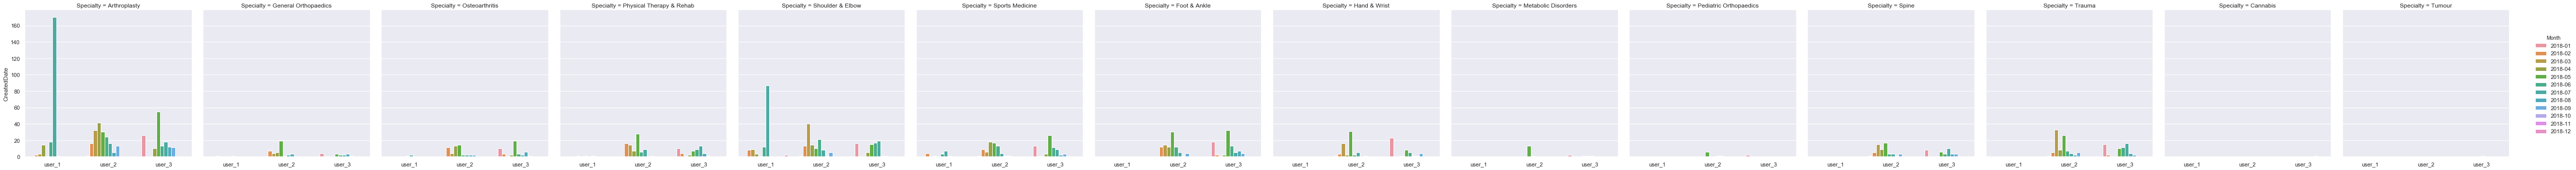

In [6]:
fg = sns.catplot(x='UserSimpleId', y='CreatedDate', hue='Month', hue_order = list_month,
                        col='Specialty', data=df_3users, kind='bar')
#fg.set_xticklabels(rotation=30)
fg.set_xlabels('')

In [8]:
# Some insides for the top 3 readers:
# 1. Two of them read the most reports in July, one of them read the most in June, and the next is July. 
#    So three of them read the most in summer time
# 2. Most popular reports among them are "Arthroplasty" and "Shoulder & Elbow"
# 3. Other popular reports are: "Physical Therapy & Rehab", "Sports Medicine", "Foot & Ankle", "Trauma", "Hand & Wrist"
# 4. The seems have no interest in "Cannabis" and "Tumour"

In [ ]:
# the following is for question 2

In [ ]:
# A: figure out reads for each specialities in each months, 
# e.g.,  find which speciality was read the most in a specific month for all the readers

In [7]:
# A contintue
# Sort with Month, and Speciality, sort with Month ascendingly, and reads descendingly
df_month_speciality = df_merge.groupby(['Month', 'Specialty']).count().reset_index()
df_month_speciality.sort_values(by=['Month','CreatedDate'], ascending=[True, False], inplace=True)
df_month_speciality.head(15)

,Month,Specialty,AceReportId,UserId,CreatedDate
0,2018-01,Arthroplasty,951,951,951
7,2018-01,Physical Therapy & Rehab,788,786,788
8,2018-01,Shoulder & Elbow,703,703,703
10,2018-01,Sports Medicine,699,697,699
11,2018-01,Trauma,660,660,660
1,2018-01,Foot & Ankle,579,578,579
5,2018-01,Osteoarthritis,566,566,566
3,2018-01,Hand & Wrist,351,347,351
9,2018-01,Spine,248,248,248
2,2018-01,General Orthopaedics,132,132,132


In [8]:
# To make lineplot, Seaborn vesion should be 0.9.0 and uppper
sns.__version__

'0.9.0'

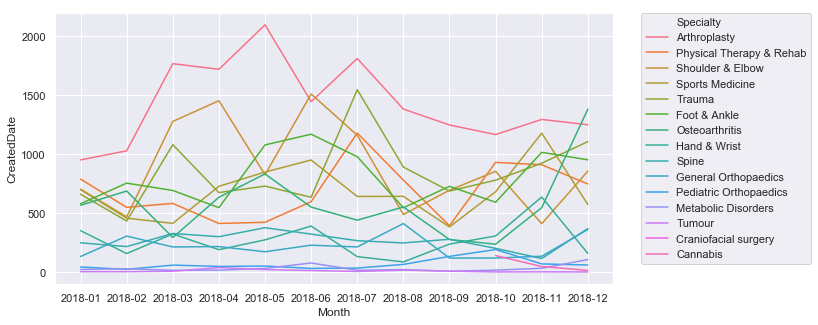

In [9]:
# A continue...
# Make a graph

plt.figure(figsize=(10,5))
fgA = sns.lineplot(x='Month', y='CreatedDate', hue='Specialty', data=df_month_speciality)
#fgA.set_xticklabels(list_month, rotation=30, horizontalalignment='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
# A continue...
# insights:
# 1. Arthroplasty was read the most in whole year
# 2. During summer time, readers read the most. e.g., in July, there are peaks for "Arthroplasty", "Trauma" 
#     and "Physical Therapy & Rehab"
# 3. The following speicalties were not read much in whole year: "Spine", "General Orthopaedics", "Hand & Wrist",
#    "Pediatric Orthopaedics", "Metabolic Disorders", "Tumour"

In [11]:
# B: find reads for each month, for all the specialties

# Group by Month
df_reads_month = df_merge.groupby(['Month']).count().reset_index()
df_reads_month

,Month,AceReportId,UserId,CreatedDate,Specialty
0,2018-01,5745,5736,5745,5745
1,2018-02,5108,5098,5108,5108
2,2018-03,7048,7032,7048,7048
3,2018-04,6973,6965,6973,6973
4,2018-05,7755,7751,7755,7755
5,2018-06,7917,7913,7917,7917
6,2018-07,8419,8419,8419,8419
7,2018-08,6125,6125,6125,6125
8,2018-09,5189,5189,5189,5189
9,2018-10,6212,6212,6212,6212


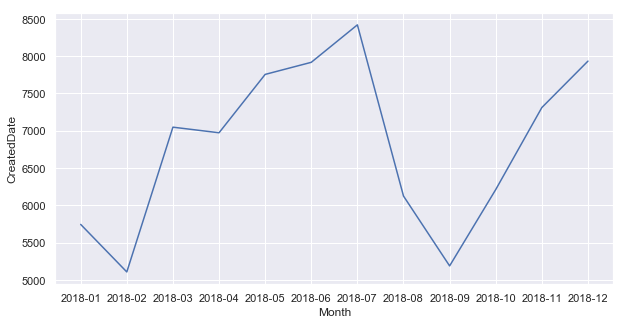

In [22]:
# B Continue...
# Make a graph
plt.figure(figsize=(10,5))
fgB = sns.lineplot(x='Month', y='CreatedDate', data=df_reads_month)

In [ ]:
# B continue...
# Insights: In February and September, readers read the least; in July, reader read the most

In [16]:
# C: find which speicalty has the most readers in the whole year

#C: sort by "Speciality" and sort by reads
df_specialty =  df_merge.groupby(['Specialty']).count().reset_index()
df_specialty.sort_values(by='CreatedDate', inplace=True, ascending=False)
df_specialty

,Specialty,AceReportId,UserId,CreatedDate,Month
0,Arthroplasty,17155,17144,17155,17155
10,Shoulder & Elbow,10698,10695,10698,10698
13,Trauma,10141,10137,10141,10141
3,Foot & Ankle,9627,9624,9627,9627
9,Physical Therapy & Rehab,8289,8282,8289,8289
12,Sports Medicine,8192,8185,8192,8192
7,Osteoarthritis,6994,6988,6994,6994
11,Spine,3265,3263,3265,3265
5,Hand & Wrist,3238,3232,3238,3238
4,General Orthopaedics,2623,2623,2623,2623


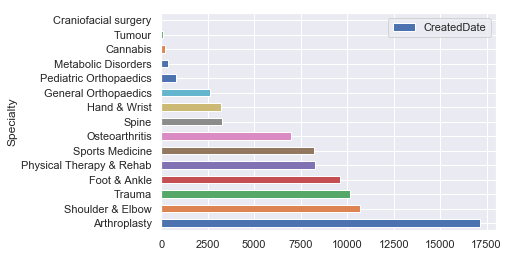

In [21]:
# C continue
# make a graph

df_specialty.plot.barh(x='Specialty', y='CreatedDate')

In [ ]:
# C continue
# Insights: 
# 1. For the whole year, "Arthroplasty" has much higher reads than other specialties. 
# 2. For the whole year, "Shoulder & Elbow", "Trauma", "Foot & Ankle" have close reads, and are second most popular reports. 
# 3. For the whole year, "Craniofacial surgery", "Tumour", "Cannabis", "Metabolic Disorders" are the least popular reports. 


In [283]:
# End